<a href="https://colab.research.google.com/github/masha713/19/blob/master/%D0%9B%D0%91_13_%D0%94%D0%B5%D0%BC%D0%B5%D1%88%D0%BE%D0%BA_%D0%9C%D0%B0%D1%80%D1%96%D1%8F_9_%D0%B2%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 13.

#Метод Ейлера

x = [1.2 1.4 1.6 1.8 2.  2.2] 
y = [2.1    2.4101 2.7258 3.0452 3.368  3.695 ]


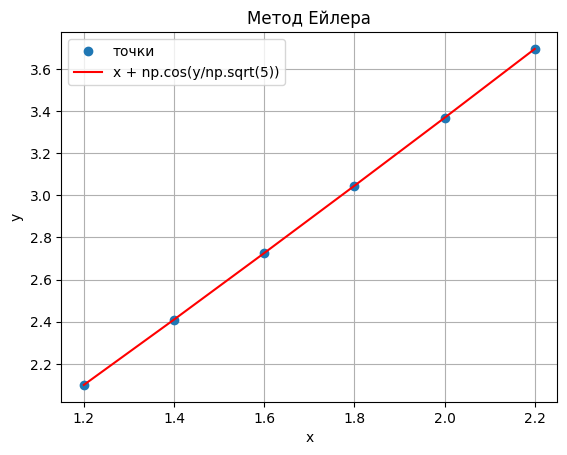

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.cos(y / np.sqrt(3))

# Вводимо параметри (ліва, права межі відрізку, крок, початкова умова)
a, b, h, y0 = 1.2, 2.2, 0.2, 2.1

# Перевірка вхідних параметрів
if h <= 0:
    print("Крок h повинен бути позитивним.")
    exit()
if a >= b:
    print("Права межа b повинна бути більшою за ліву межу a.")
    exit()

n = int((b - a) / h) # кількість кроків

x = np.array([a + i*h for i in range(n + 1)]) # задаємо x генератором списків

y = np.empty(n + 1)
y[0] = y0

for i in range(n):
    y[i + 1] = y[i] + f(x[i], y[i]) * h

y_rounded = np.round(y, 4)
print("x =", x, "\ny =", y_rounded)

plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера")
plt.legend(["точки", "x + np.cos(y/np.sqrt(5))"])
plt.grid()
plt.show()

In [ ]:
#Додати перевірку odeint для першого завдання


In [ ]:
#додати перевірку solve_ivp для перешого завдання

#Метод Ейлера-Коші

x = [1.2 1.4 1.6 1.8 2.  2.2] 
y = [2.1    2.4129 2.7301 3.0508 3.375  3.7045]


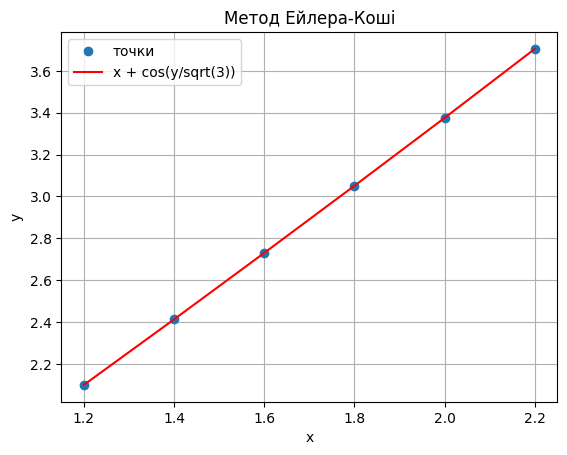

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.cos(y / np.sqrt(3))

a = 1.2  # ліва межа відрізку
b = 2.2  # права межа відрізку
h = 0.2  # крок
# Генерація x, враховуючи останнє значення
n = int(round((b - a) / h))  # кількість кроків
x = np.array([a + i*h for i in range(n + 1)])  # Задати x з включенням b точно

y = np.empty(n + 1)
y[0] = 2.1  # початкова умова

# Метод Ейлера-Коші
for i in range(n):
    y[i + 1] = y[i] + (f(x[i], y[i]) + f(x[i + 1], y[i] + h * f(x[i], y[i]))) * h / 2

y_rounded = np.round(y, 4)

print("x =", x, "\ny =", y_rounded)

plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера-Коші")
plt.legend(["точки", "x + cos(y/sqrt(3))"])
plt.grid()
plt.show()


#Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint

x = [1.2 1.4 1.6 1.8 2.  2.2]
y = [2.1    2.4129 2.7302 3.0506 3.3747 3.7039]


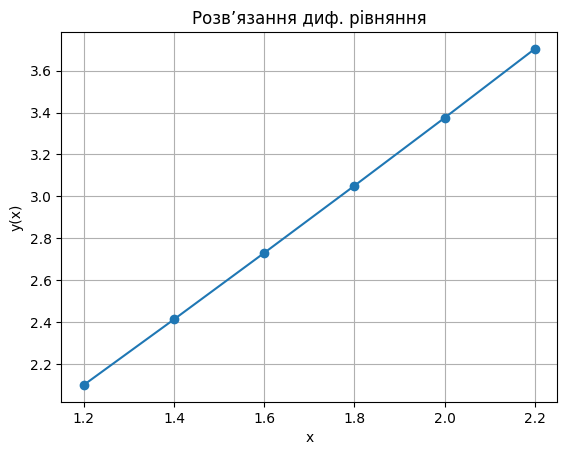

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    return x + np.cos(y / np.sqrt(3))

# Початкова умова
y0 = 2.1

# Значення x з кроком 0.2 від 1.2 до 2.2
x = np.array([1.2 + i * 0.2 for i in range(0, 6)])

# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x =', np.round(x, 4))
print('y =', np.round(y.flatten(), 4))  # Перетворення в одновимірний масив

# Побудова графіка результатів
plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()


#Використання scipy.integrate.solve_ivp
Функція solve_ivp є більш сучасним і гнучким способом розв'язання ODE, ніж odeint. Вона також дозволяє використовувати різні методи інтегрування.

x = [1.2 1.4 1.6 1.8 2.  2.2]
y = [2.1    2.4129 2.7302 3.0507 3.3747 3.7039]


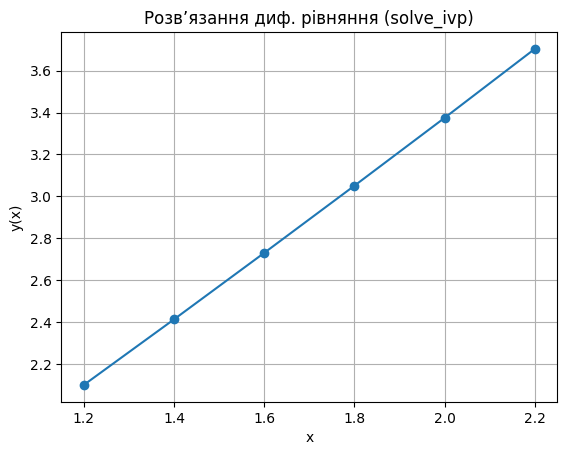

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    return x + np.cos(y / np.sqrt(3))

# Початкова умова
y0 = [2.1]

# Значення x
x = np.linspace(1.2, 2.2, 6)

# Розв'язання ODE
sol = solve_ivp(model, [1.2, 2.2], y0, t_eval=x)

# Виведення результатів
print('x =', np.round(sol.t, 4))
print('y =', np.round(sol.y[0], 4))

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння (solve_ivp)')
plt.grid()
plt.show()
